<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Sidorczuk Nicolas Andres

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################
from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [37]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


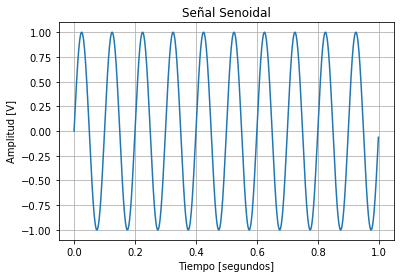

In [4]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
def Senoidal_Generator(fs, f0, N, a0=1, p0=0, plot=0): 
    """
    Quiero un gen de señales senoidales. Necesito:
    f0: frecuencia
    a0: amplitud
    p0: fase
    N: n de muestras
    fs: f de muestreo
    Devuelve:
    x: Tiempo
    y: Amplitud
    """
    ts=1/fs
    
    x = np.linspace(0,(N-1)*ts,N).flatten() #linspace(start,stop,total)
    x = x.reshape(N,1)

    y = a0 * np.sin(x*2*np.pi*f0 + p0).flatten()
    y = y.reshape(N,1)

    if plot!=0:
        #plt.ylim([-2, 1])
        plt.figure(plot)
        plt.grid(True)
        plt.plot(x,y)
        plt.title('Señal Senoidal')
        plt.xlabel('Tiempo [segundos]')
        plt.ylabel('Amplitud [V]')  
    return x,y

plot = 1
time,val = Senoidal_Generator(fs,f0,N,a0,p0,plot)

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si. Se observa claramente multiples périodos de la senoidal y que se repite cada T=0,1s por lo que la frecuencia es la inversa f=1/T=10Hz
</div>

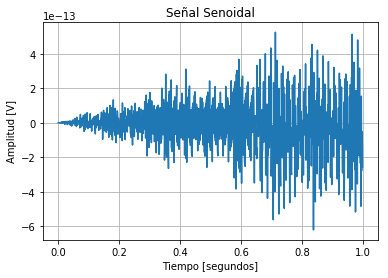

In [5]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
plot = 2
time,val = Senoidal_Generator(fs,f0,N,a0,p0,plot)

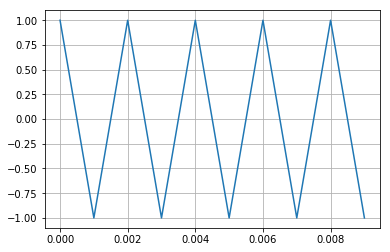

In [6]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
time,val = Senoidal_Generator(fs,f0,N,a0,p0)
plt.grid(True)
plt.plot(time[0:10],val[0:10])

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En el caso a.2 no se pueden conocer los parámetros de la senoidal. En el caso a.3 aunque se ve una triangular si se pude determinar los parametros: frecuencia f=1/0,002s=500Hz, fase=pi/2 ya que comienza en el valor máximo positivo y amplitud máxima a0=1.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En el caso a.2 lo que parece ser una señal aleatoria en realidad deberia ser todo cero, de hecho la escala vertical indica que los valores deben multiplicarse por 10^-13 por lo que los valores son prácticamente cero y se deben a errores en el calculo  del programa. Esto se explica si se analiza los valores que son muestreados de la senoidal de fs/2. Cada muestra se toma cada Ts=1/fs que se corresponde con cada cruce por cero de la senoidal de fs/2 ya que la fase es de cero radianes.
Para el caso a.3 como la fase es pi/2 radianes cada muestra coincide con los máximos positivos y negativos de la senoidal por lo que las muestras alternan entre +/-a0 y se ve una triangular porque el programa une los puntos con lineas rectas.
</div>

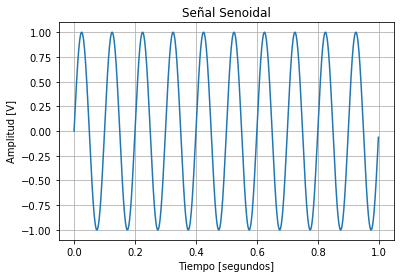

In [7]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
plot = 3
time,val = Senoidal_Generator(fs,f0,N,a0,p0,plot)

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No, no es posible. 
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Lo que se debe hacer es implementar un filtro analógico previo al muestreo de la señal tipo pasa bajos con frecuencia de corte igual a fs/2. De esta forma nos aseguramos no tener energia en componentes espectrales que produzcan aliasing (solapamiento) debido a la periodicidad del espectro.
</div>

In [8]:
from pandas import DataFrame
from IPython.display import HTML

<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert$
,,,$F:f \neq f_0$
$f_S/4$,1.0,8.568e-15,1.136e-12
$f_S/4+0.01$,0.9998,0.0101,0.1268
$f_S/4+0.25$,0.8996,0.3008,2.804
$f_S/4+0.5$,0.6366,0.6366,4.282


<Figure size 432x288 with 0 Axes>

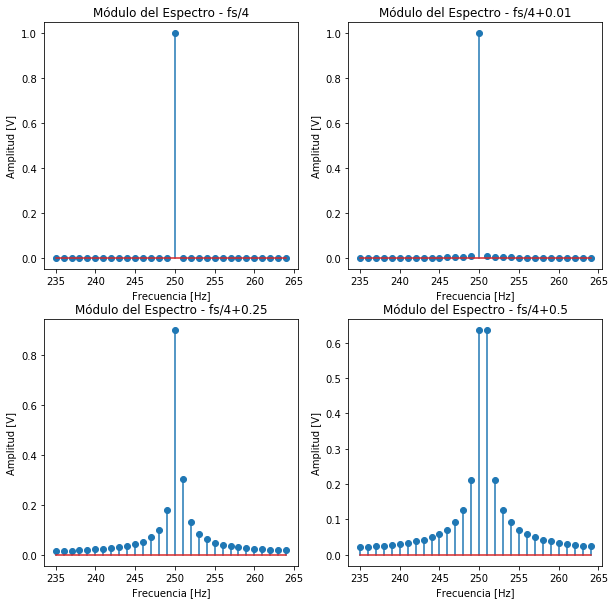

In [45]:
def Analizador_de_Espectro(señal, N, Ts, plot=0):
    freq = np.fft.fftfreq(N, Ts)
    señal=señal.reshape(1,N)
    espectro = np.fft.fft(señal)#/(N/2)
    if plot!=0:
        modulo=np.abs(espectro/(N/2))
        modulo=modulo.reshape(N,1)
        fase=np.angle(espectro)
        fase=fase.reshape(N,1)
        fin=(N/2)-1
        plt.figure(plot)
        plt.subplot(211)
        plt.stem(freq[0:int(fin)], modulo[0:int(fin)])#'ro'
        plt.title('Módulo del Espectro')
        plt.xlabel('Frecuencia [Hz]')
        plt.ylabel('Amplitud [V]')
        plt.grid(True)
        plt.subplot(212)
        plt.stem(freq[0:int(fin)], fase[0:int(fin)])
        plt.title('Fase del Espectro')
        plt.xlabel('Frecuencia [Hz]')
        plt.ylabel('Radianes [rd]')
        plt.grid(True)
    return espectro,freq

def Vectorize(X,vector,N,n):
    X[n,0] = vector[250]
    X[n,1] = vector[251]
    R = int(N/2)
    for i in range(R):
        X[n,2] += vector[i]
    X[n,2] -= vector[250]
    return X

def PrintModule(freq,espectro,beg,fin,x,y,label,tipo="stem"):
    N=len(espectro.T)
    modulo=np.abs(espectro/(N/2))
    modulo=modulo.reshape(N,1)
    plt.figure(figsize=(x,y))
    if tipo == "plot":
        plt.plot(freq[int(beg):int(fin)], modulo[int(beg):int(fin)])
    else:
        plt.stem(freq[int(beg):int(fin)], modulo[int(beg):int(fin)])
    plt.title('Módulo del Espectro - '+label)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud [V]')
    
def PrintPhase(freq,espectro,beg,fin,x,y,label,tipo="stem"):
    N=len(espectro.T)
    fase=np.angle(espectro/(N/2))
    fase=fase.reshape(N,1)
    plt.figure(figsize=(x,y))
    if tipo == "plot":
        plt.plot(freq[int(beg):int(fin)], fase[int(beg):int(fin)])
    else:
        plt.stem(freq[int(beg):int(fin)], fase[int(beg):int(fin)])
    plt.title('Fase del Espectro - '+label)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Fase [rad]')
#######################################
fs=1000
Ts=1/fs
N=1000
a0=1
p0=0
f0=fs/4
delta = 15
beg = f0-delta
fin = f0+delta
X = np.zeros([4,3])

time,val = Senoidal_Generator(fs,f0,N,a0,p0)
espectro,freq = Analizador_de_Espectro(val,N,Ts)
modulo=np.abs(espectro/(N/2))
modulo=modulo.reshape(N,1)
X = Vectorize(X,modulo,N,0)
plt.figure(1)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.stem(freq[int(beg):int(fin)], modulo[int(beg):int(fin)])#'ro'
plt.title('Módulo del Espectro - fs/4')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V]')

f0=(fs/4)+0.01
time,val = Senoidal_Generator(fs,f0,N,a0,p0)
espectro,freq = Analizador_de_Espectro(val,N,Ts)
modulo=np.abs(espectro/(N/2))
modulo=modulo.reshape(N,1)
X = Vectorize(X,modulo,N,1)
plt.subplot(222)
plt.stem(freq[int(beg):int(fin)], modulo[int(beg):int(fin)])#'ro'
plt.title('Módulo del Espectro - fs/4+0.01')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V]')

f0=(fs/4)+0.25
time,val = Senoidal_Generator(fs,f0,N,a0,p0)
espectro,freq = Analizador_de_Espectro(val,N,Ts)
modulo=np.abs(espectro/(N/2))
modulo=modulo.reshape(N,1)
X = Vectorize(X,modulo,N,2)
plt.subplot(223)
plt.stem(freq[int(beg):int(fin)], modulo[int(beg):int(fin)])
plt.title('Módulo del Espectro - fs/4+0.25')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V]')

f0=(fs/4)+0.5
time,val = Senoidal_Generator(fs,f0,N,a0,p0)
espectro,freq = Analizador_de_Espectro(val,N,Ts)
modulo=np.abs(espectro/(N/2))
modulo=modulo.reshape(N,1)
X = Vectorize(X,modulo,N,3)
plt.subplot(224)
plt.stem(freq[int(beg):int(fin)], modulo[int(beg):int(fin)])
plt.title('Módulo del Espectro - fs/4+0.5')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V]')


tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert$'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [str(round_sig(X[0,0],4)), str(round_sig(X[0,1],4)), str(round_sig(X[0,2],4))], # <-- acá debería haber numeritos :)
                  [str(round_sig(X[1,0],4)), str(round_sig(X[1,1],4)), str(round_sig(X[1,2],4))], # <-- acá debería haber numeritos :)
                  [str(round_sig(X[2,0],4)), str(round_sig(X[2,1],4)), str(round_sig(X[2,2],4))], # <-- acá debería haber numeritos :)
                  [str(round_sig(X[3,0],4)), str(round_sig(X[3,1],4)), str(round_sig(X[3,2],4))]  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$. 
</div>

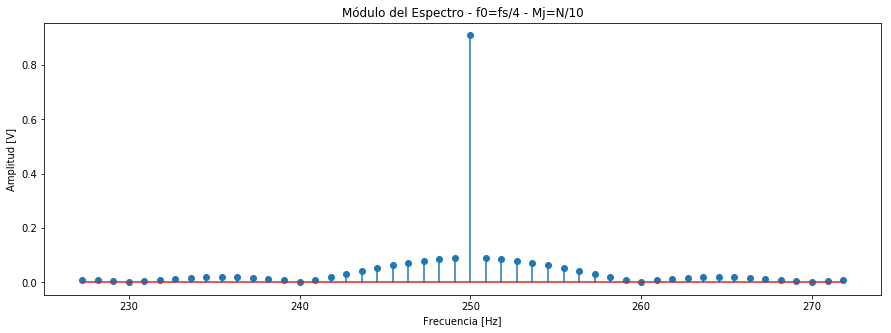

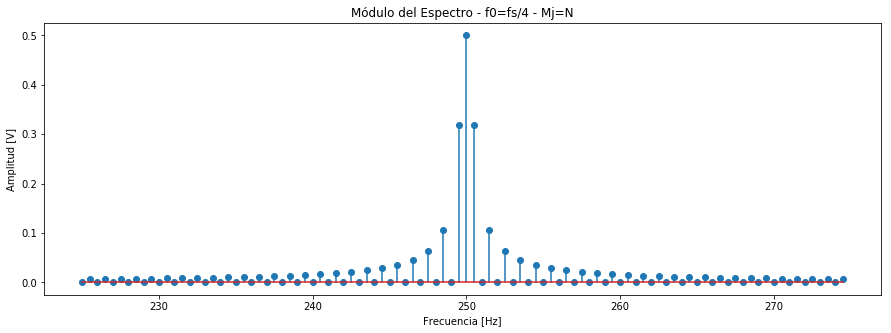

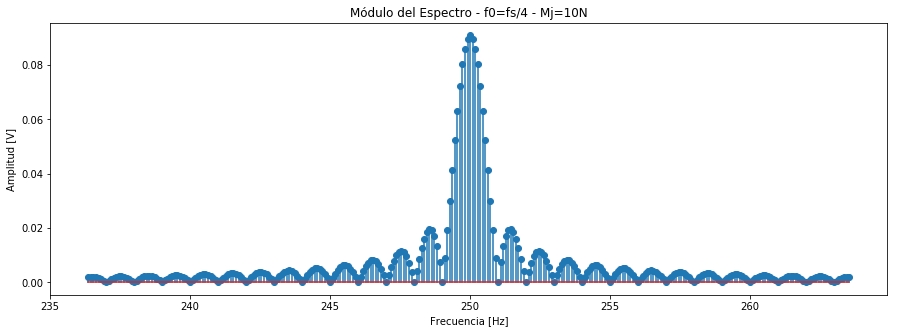

In [10]:
# Inserte aquí su código
fs=1000
Ts=1/fs
N=1000
f0=fs/4

n=int(N/10)
Mj = np.zeros([n,1])
time,val = Senoidal_Generator(fs,f0,N)
val = np.vstack((val,Mj))
espectro,freq = Analizador_de_Espectro(val,(N+n),Ts)
PrintModule(freq,espectro,250,300,15,5,'f0=fs/4 - Mj=N/10') #f,H(f),start,stop,size,label

n=int(N)
Mj = np.zeros([n,1])
time,val = Senoidal_Generator(fs,f0,N)
val = np.vstack((val,Mj))
espectro,freq = Analizador_de_Espectro(val,(N+n),Ts)
PrintModule(freq,espectro,450,550,15,5,'f0=fs/4 - Mj=N') #f,H(f),start,stop,size,label

n=int(10*N)
Mj = np.zeros([n,1])
time,val = Senoidal_Generator(fs,f0,N)
val = np.vstack((val,Mj))
espectro,freq = Analizador_de_Espectro(val,(N+n),Ts)
PrintModule(freq,espectro,2600,2900,15,5,'f0=fs/4 - Mj=10N') #f,H(f),start,stop,size,label
#PrintModule(freq,espectro,2700,2800,15,5,'f0=fs/4 - Mj=10N')

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como la frecuencia de sampling es la misma pero el número total de muestras aumenta a N+Mj, la resolución espectral disminuye en todos los casos, es decir, el $\Delta f$ se hace mas pequeño.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En todos los casos la señal temporal está multiplicada por una señal rectangular de amplitud unitaria cuyo ancho es el de la señal original. Esto causa en el espectro la convolución del seno por la cuadrada por lo que se observa un efecto del tipo "sinc" el cual se desplaza a la frecuencia de la senoidal. Al agregar ceros cambio la resolución espectral y los bines cambian de frecuencia, por lo tanto los ceros de esta "sinc", llamada kernel de dirichlet, ya no caen en todos los bines distintos de $f_0$. De hecho en todos los casos lo ceros de esta sinc estan ubicados según la relación entre el número de muestras total (N+$M_j$) y el ancho de la rectangular (N) a partir de $f_0$ hacia ambos lados. Mientras mas ceros agrego mejor se ve la sinc ya que agrego cada vez mas puntos en cada lobulo. 
</div>

<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1,1,$f_0$=9.0
,,,
simulación,1.0,1.0,9.0


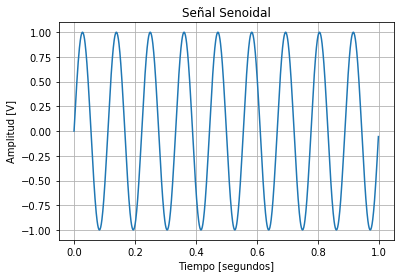

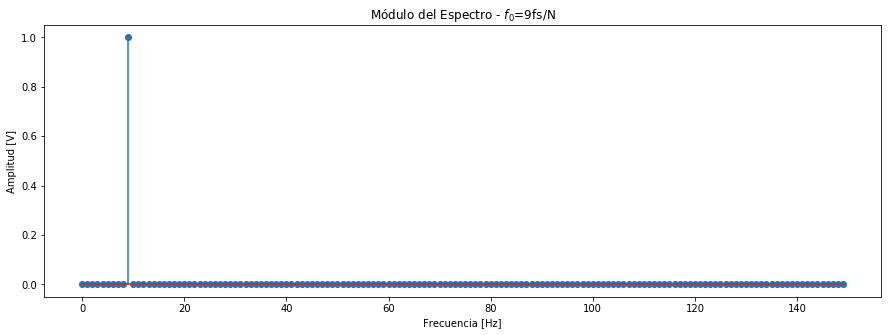

In [47]:
def Energiaf(E,N):
    R = int(N/2)
    E = E.reshape(N,1)
    A = 0
    for i in range(R):
        A += (np.abs(E[i]))**2
    return (A*(2/N)**2)

def EnergiaN(E,N):
    NS = len(E)
    E = E.reshape(NS,1)
    A = 0
    for i in range(NS):
        A += (np.abs(E[i]))**2
    return (A*(2/N))

def Ef0(x,y,N):
    R = int(N/2)
    A = 0
    M = 0
    x = x.reshape(N,1)
    y = y.reshape(N,1)
    for i in range(R):
        A += x[i] * np.abs(y[i])
        M += np.abs(y[i])
    return (A/M)

def ArgMax(x,y,N):
    R = int(N/2)
    y = abs( y.reshape(N,1) )
    E = []
    for i in range(R):
        E.append( (y[i])**2 )
    pos = np.argmax(E)
    return (x[pos])

def PrintArb(x,y,xlabel,ylabel,Title):
    plt.figure()
    plt.grid(True)
    plt.plot(x,y)
    plt.title(Title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def cleanS(E,N):
    E = E.reshape(N,1)
    for i in range(N):
        if abs(E[i]) < 1e-12:
            E[i] = 0
    return E.reshape(1,N)
#######################################
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
X = np.zeros((2,3))

time,s1 = Senoidal_Generator(fs,f0,N,plot=1)
espectro,freq = Analizador_de_Espectro(s1,N,Ts)
espectro = cleanS(espectro,N)
PrintModule(freq,espectro,0,150,15,5,'$f_0$=9fs/N') #f,H(f),start,stop,Xsize,Ysize,label,Type
X[1,0] = Energiaf(espectro,N)
X[1,1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[1,2] = ArgMax(freq,espectro,N)

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1', '1' , '$f_0$='+str(f0)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[1,0],4)),str(round_sig(X[1,1],4)), str(round_sig(X[1,2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9 = 0.1111,E < 1/9,$f_0$=9.0
,,,
simulación,0.1111,0.01235,8.0


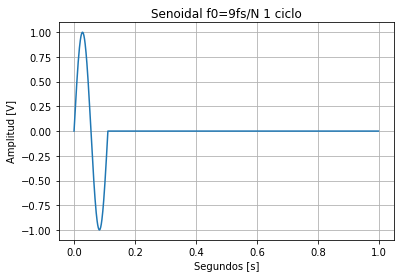

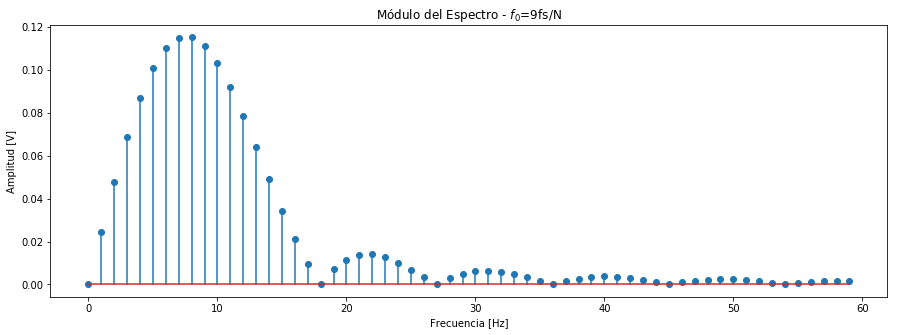

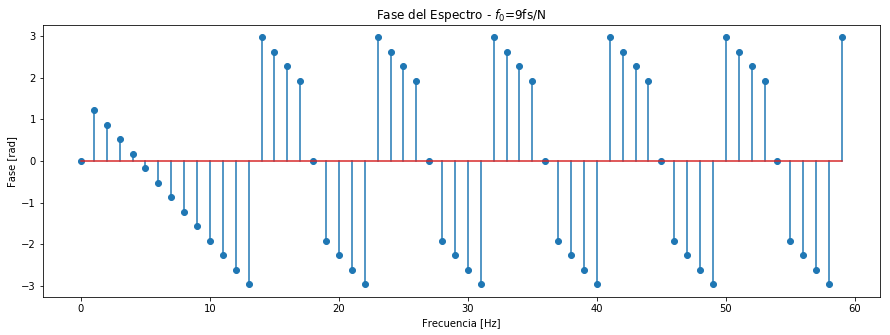

In [51]:
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
X = np.zeros(3)

NV = int( 1/(f0*Ts) )
Z = np.zeros([(N-NV),1]) 

time,s2 = Senoidal_Generator(fs,f0,NV)
time = np.linspace(0,(N-1)*Ts,N).flatten() #linspace(start,stop,total)
time = time.reshape(N,1)
s2 = np.vstack((s2,Z))
PrintArb(time,s2,'Segundos [s]','Amplitud [V]','Senoidal f0=9fs/N 1 ciclo')

espectro,freq = Analizador_de_Espectro(s2,N,Ts)
espectro = cleanS(espectro,N)
PrintModule(freq,espectro,0,60,15,5,'$f_0$=9fs/N') #f,H(f),start,stop,Xsize,Ysize,label,Type
PrintPhase(freq,espectro,0,60,15,5,'$f_0$=9fs/N')
X[0] = Energiaf(espectro,N)
X[1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[2] = ArgMax(freq,espectro,N)

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9 = '+str(str(round_sig(1/9,4))), 'E < 1/9', '$f_0$='+str(f0)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[0],4)), str(round_sig(X[1],4)), str(round_sig(X[2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se esperaba que la energía total de la señal sea menor. Debido a que al tomar menos ciclos de la misma señal al área va a ser menor entonces la energía que es proporcional al área debe ser menor. En este caso como se paso de tener 9 ciclos a 1 ciclo, la enrgía total también es 9 veces menor.<br/> Luego considerando que mantengo el mismo número de muestras totales la resolución espectral es la misma pero los ceros del efecto "sinc" debido a la ventana rectangular cambian de lugar. Antes los ceros coincidian con cada bin a partir del central, pero ahora los ceros están cada $f_0$ a partir del centro del lóbulo principal. Esta aparición de componentes espectrales, que previamente eran nulas, ocaciona una distribución de la energía. Por lo tanto la energía en $f_0$ pasa a ser menor que la que había en el caso anterior. Cabe mencionar que la frecuencia de máxima energía no es la prevista, sino que esta un bin desplazada. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9 = 0.1111,E < 1/9,$f_0$=9.0
,,,
simulación,0.1111,0.01235,8.0


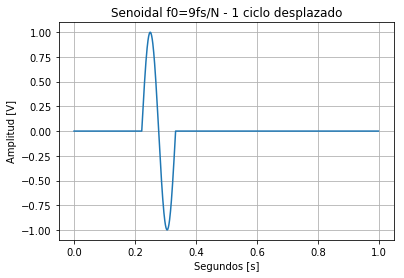

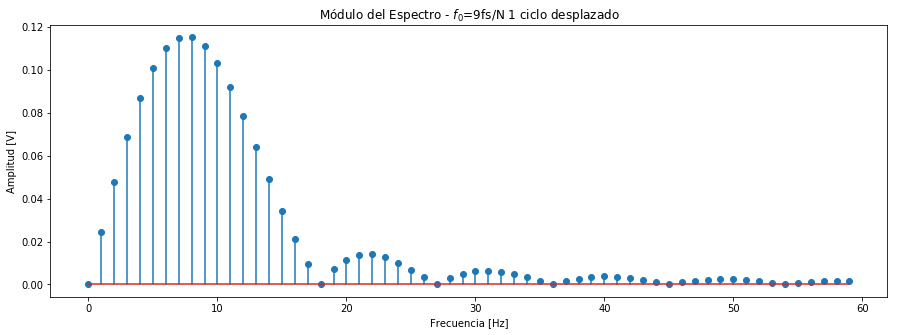

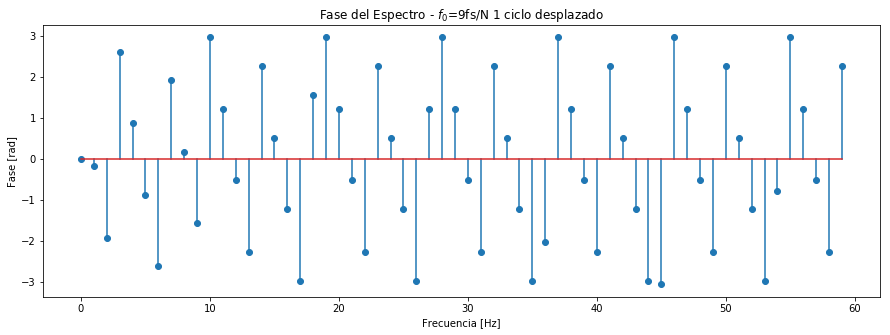

In [55]:
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
X = np.zeros(3)

NV = int( 1/(f0*Ts) )
ND = 2 * NV
Z1 = np.zeros([ND,1]) 
Z2 = np.zeros([(N-NV-ND),1]) 

time,s2 = Senoidal_Generator(fs,f0,NV)
time = np.linspace(0,(N-1)*Ts,N).flatten() #linspace(start,stop,total)
time = time.reshape(N,1)
s2 = np.vstack((Z1,s2))
s2 = np.vstack((s2,Z2))
PrintArb(time,s2,'Segundos [s]','Amplitud [V]','Senoidal f0=9fs/N - 1 ciclo desplazado')

espectro,freq = Analizador_de_Espectro(s2,N,Ts)
PrintModule(freq,espectro,0,60,15,5,'$f_0$=9fs/N 1 ciclo desplazado') #f,H(f),start,stop,Xsize,Ysize,label,Type
PrintPhase(freq,espectro,0,60,15,5,'$f_0$=9fs/N 1 ciclo desplazado')
X[0] = Energiaf(espectro,N)
X[1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[2] = ArgMax(freq,espectro,N)

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9 = '+str(round_sig(1/9,4)), 'E < 1/9', '$f_0$='+str(f0)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[0],4)), str(round_sig(X[1],4)), str(round_sig(X[2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso el módulo del espectro de la señal no cambia ya que la misma solo se desplazo, no cambio su forma. Sin embargo si se nota un cambio en la fase. Esto se debe a una propiedad de la transformada de fourier por la cual un desplazamiento temporal provoca en el espectro un cambio de fase lineal igual &omega;to, donde to es igual al tiempo que se desplazo la señal. De las energías no se esperaban cambios ya que como se dijo solo cambia la fase.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9+1/8 = 0.2361,E < 1/9+1/8,$f_1$=8.0
,,,
simulación,0.2361,0.04903,6.0


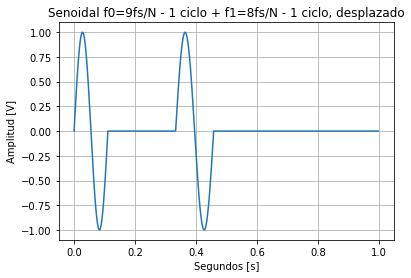

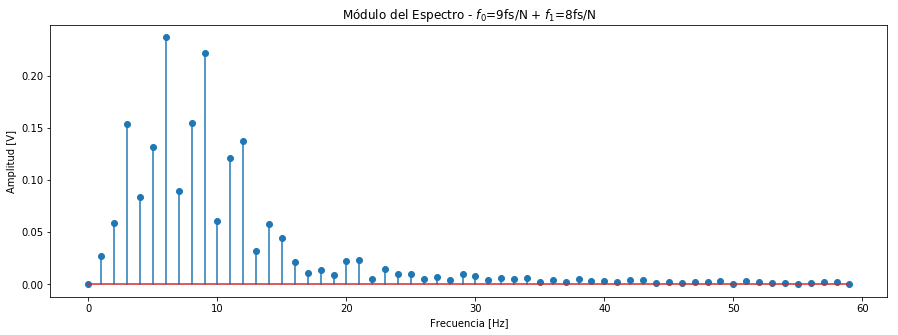

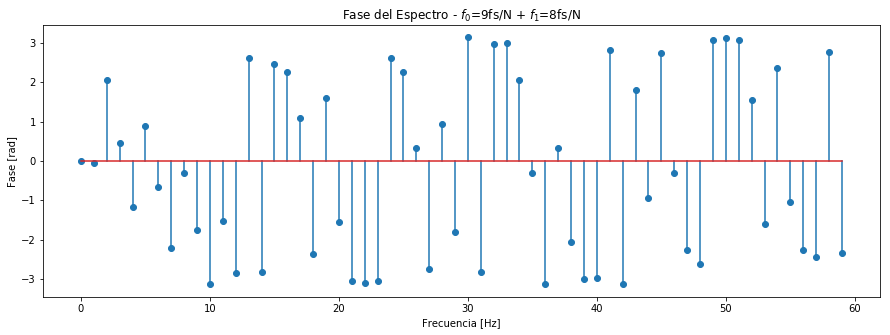

In [57]:
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
f1=(8*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
f1_i = int(np.around(f1/Deltaf))
X = np.zeros(3)

NV0 = int( 1/(f0*Ts) )
NV1 = int( 1/(f1*Ts) )
ND = 2 * NV0
Z1 = np.zeros([ND,1]) 
Z2 = np.zeros([(N-NV0-NV1-ND),1]) 

t0,s0 = Senoidal_Generator(fs,f0,NV0)
t1,s1 = Senoidal_Generator(fs,f1,NV1)
time = np.linspace(0,(N-1)*Ts,N).flatten() #linspace(start,stop,total)
time = time.reshape(N,1)

s = np.vstack((s0,Z1))
s = np.vstack((s,s1))
s = np.vstack((s,Z2))
PrintArb(time,s,'Segundos [s]','Amplitud [V]','Senoidal f0=9fs/N - 1 ciclo + f1=8fs/N - 1 ciclo, desplazado')

espectro,freq = Analizador_de_Espectro(s,N,Ts)
espectro = cleanS(espectro,N)
PrintModule(freq,espectro,0,60,15,5,'$f_0$=9fs/N + $f_1$=8fs/N') #f,H(f),start,stop,Xsize,Ysize,label,Type
PrintPhase(freq,espectro,0,60,15,5,'$f_0$=9fs/N + $f_1$=8fs/N')
X[0] = Energiaf(espectro,N)
X[1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[2] = ArgMax(freq,espectro,N)

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9+1/8 = '+str(round_sig(1/9+1/8,4)), 'E < 1/9+1/8','$f_1$='+str(f1)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[0],4)), str(round_sig(X[1],4)), str(round_sig(X[2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso se esperaba una concentración de energía en las frecuencias de ambos ciclos, 8 y 9, pero se observa un gran desparramo en la zona de dichas frecuencias. En este caso hay una superposición de los espectros de las señales además de que una presenta una fase adicional debido al desplazamiento temporal. Al tener un ancho pequeño de la ventana rectangular, la resolución de la fft es mala y no logran distinguirse correctamente las componentes, de hecho el punto de mas energía se ubica en un bin diferente. Si se mejora esta resolución debería limpiarse un poco el espectro y de está manera podría sacarse información mas útil del mismo.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9+1/8 = 0.2361,E < 1/9+1/8,$f_1$=8.0
,,,
simulación,0.2361,0.0491,6.0


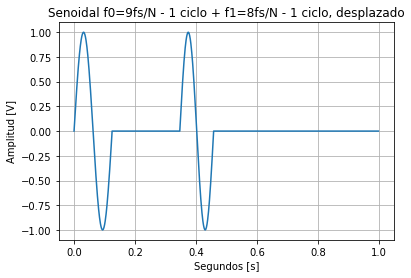

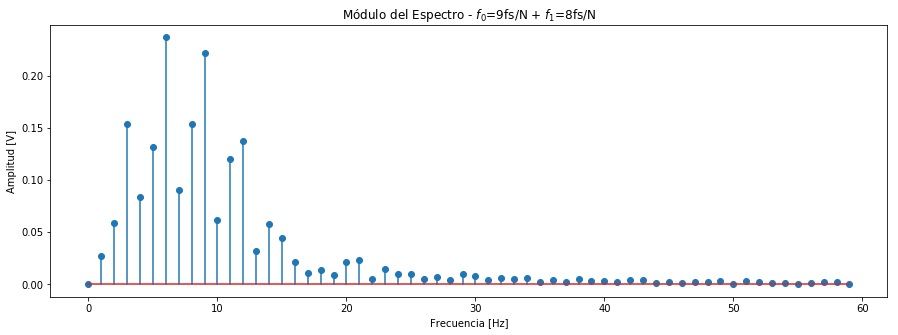

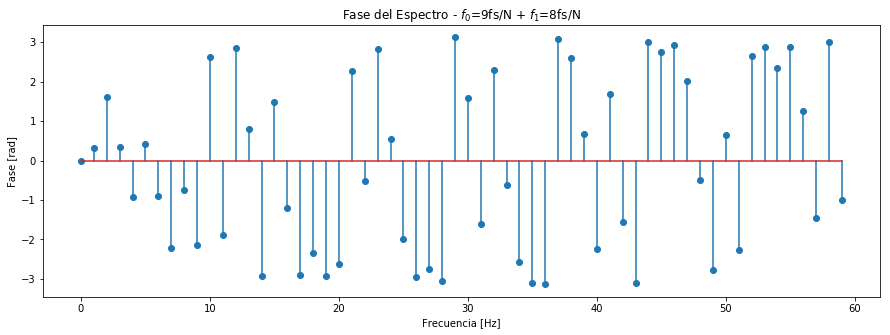

In [58]:
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
f1=(8*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
f1_i = int(np.around(f1/Deltaf))
X = np.zeros(3)

NV0 = int( 1/(f0*Ts) )
NV1 = int( 1/(f1*Ts) )
ND = 2 * NV0
Z1 = np.zeros([ND,1]) 
Z2 = np.zeros([(N-NV0-NV1-ND),1]) 

t0,s0 = Senoidal_Generator(fs,f0,NV0)
t1,s1 = Senoidal_Generator(fs,f1,NV1)
time = np.linspace(0,(N-1)*Ts,N).flatten() #linspace(start,stop,total)
time = time.reshape(N,1)

s = np.vstack((s1,Z1))
s = np.vstack((s,s0))
s = np.vstack((s,Z2))
PrintArb(time,s,'Segundos [s]','Amplitud [V]','Senoidal f0=9fs/N - 1 ciclo + f1=8fs/N - 1 ciclo, desplazado')

espectro,freq = Analizador_de_Espectro(s,N,Ts)
espectro = cleanS(espectro,N)
PrintModule(freq,espectro,0,60,15,5,'$f_0$=9fs/N + $f_1$=8fs/N') #f,H(f),start,stop,Xsize,Ysize,label,Type
PrintPhase(freq,espectro,0,60,15,5,'$f_0$=9fs/N + $f_1$=8fs/N')
X[0] = Energiaf(espectro,N)
X[1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[2] = ArgMax(freq,espectro,N)

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9+1/8 = '+str(round_sig(1/9+1/8,4)), 'E < 1/9+1/8','$f_1$='+str(f1)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[0],4)), str(round_sig(X[1],4)), str(round_sig(X[2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El módulo del espectro es muy similar, pero hay cambios en la fase. No se puede determinar cual ocurrio antes. En este caso es dificil determinar la forma de la señal temporal a partir del espectro, como se explico en el punto anterior.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

[0.11111111]


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,3/9 = 0.3333,E < 3/9,$f_0$=9.0
,,,
simulación,0.3333,0.1111,9.0


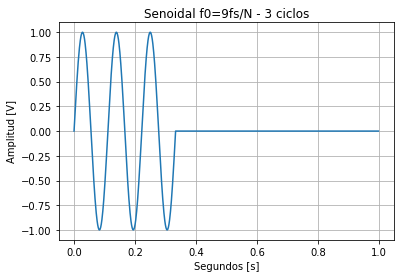

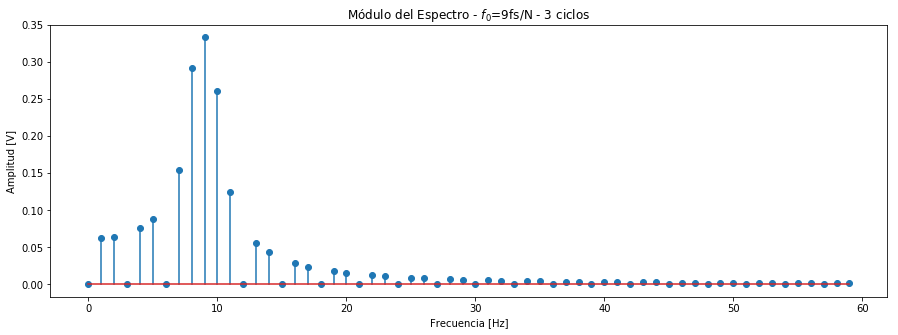

In [59]:
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
X = np.zeros(3)

NV = int( 3/(f0*Ts) )
Z = np.zeros([(N-NV),1]) 

time,s = Senoidal_Generator(fs,f0,NV)
time = np.linspace(0,(N-1)*Ts,N).flatten() #linspace(start,stop,total)
time = time.reshape(N,1)
s = np.vstack((s,Z))
PrintArb(time,s,'Segundos [s]','Amplitud [V]','Senoidal f0=9fs/N - 3 ciclos')

espectro,freq = Analizador_de_Espectro(s,N,Ts)
espectro = cleanS(espectro,N)
PrintModule(freq,espectro,0,60,15,5,'$f_0$=9fs/N - 3 ciclos') #f,H(f),start,stop,Xsize,Ysize,label,Type
X[0] = Energiaf(espectro,N)
X[1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[2] = ArgMax(freq,espectro,N)
print( EnergiaN(s2,N) )

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['3/9 = '+str(round_sig(3/9,4)), 'E < 3/9', '$f_0$='+str(f0)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[0],4)), str(round_sig(X[1],4)), str(round_sig(X[2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso que tengo 3 ciclos la energía es nueve veces menor que con 9 ciclos y 9 veces mayor que la señal de un ciclo. Por lo tanto lo que se ve es que la energía de la componente $f_0$ es proporcional al cuadrado del área de la señal ya que cada vez que reduzco 3 veces los ciclos de la señal, el área se reduce de la misma manera y la energía con el cuadrado, es decir, es nueve veces menor.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idem anterior, pero cada ciclo con diferente amplitud.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9+1/81+1/729 = 0.1248,E < 1/9+1/81+1/729,$f_0$=9.0
,,,
simulación,0.1248,0.02576,9.0


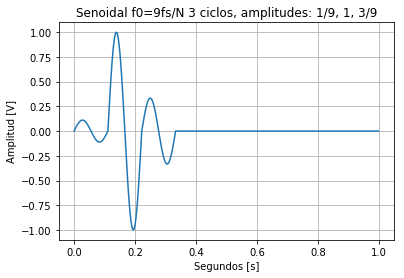

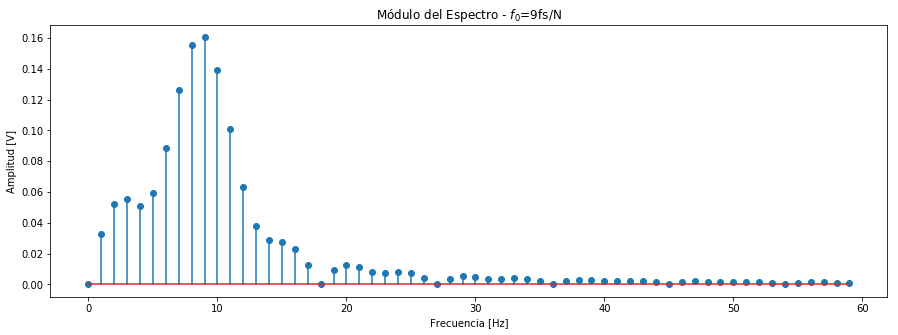

In [60]:
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
X = np.zeros(3)

NV = int( 1/(f0*Ts) )
Z = np.zeros([(N-3*NV),1]) 

time,s1 = Senoidal_Generator(fs,f0,NV,1/9)
time,s2 = Senoidal_Generator(fs,f0,NV,1)
time,s3 = Senoidal_Generator(fs,f0,NV,3/9)
time = np.linspace(0,(N-1)*Ts,N).flatten() #linspace(start,stop,total)
time = time.reshape(N,1)
s = np.vstack((s1,s2))
s = np.vstack((s,s3))
s = np.vstack((s,Z))
PrintArb(time,s,'Segundos [s]','Amplitud [V]','Senoidal f0=9fs/N 3 ciclos, amplitudes: 1/9, 1, 3/9')

espectro,freq = Analizador_de_Espectro(s,N,Ts)
espectro = cleanS(espectro,N)
PrintModule(freq,espectro,0,60,15,5,'$f_0$=9fs/N') #f,H(f),start,stop,Xsize,Ysize,label,Type
#PrintPhase(freq,espectro,0,60,15,5,'$f_0$=9fs/N')
X[0] = Energiaf(espectro,N)
X[1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[2] = ArgMax(freq,espectro,N)
#print( EnergiaN(s2,N) )

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9+1/81+1/729 = '+str(round_sig(1/9+1/81+1/729,4)), 'E < 1/9+1/81+1/729', '$f_0$='+str(f0)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[0],4)), str(round_sig(X[1],4)), str(round_sig(X[2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso la diferentes amplitudes ocacionan la aparición de otras componentes espectrales por lo que la energía desparrama mas y entonces la energía en $f_0$ es menor.<br/>Con repecto a la energía total, cada ciclo aporta de forma cuadrática a su amplitud. Como en este caso la relación entre cada amplitud de 3 veces entonces la energía de cada ciclo decrece nueve veces. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">Idem anterior, pero repetida 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,(1/9+1/81+1/729)*3 = 0.3745,E < (1/9+1/81+1/729)*3,$f_0$=9.0
,,,
simulación,0.3745,0.2318,9.0


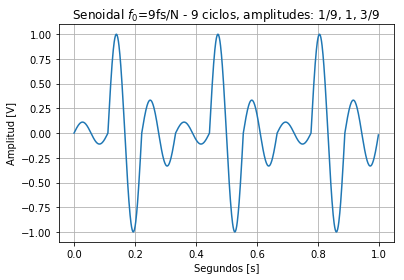

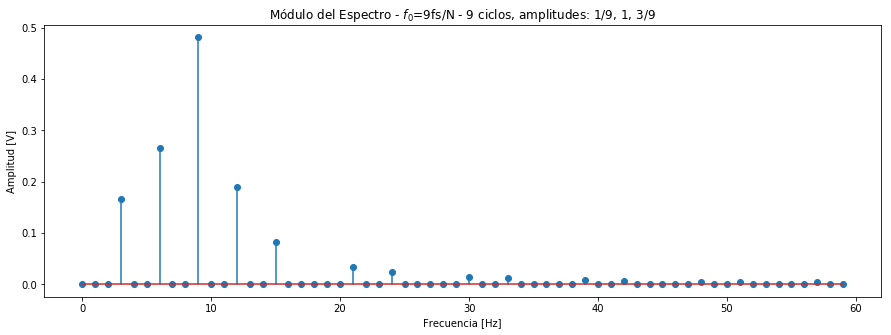

In [62]:
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
X = np.zeros(3)

NV = int( 1/(f0*Ts) )
#Z = np.zeros([(N-9*NV),1]) 

time,s1 = Senoidal_Generator(fs,f0,NV,1/9)
time,s2 = Senoidal_Generator(fs,f0,NV,1)
time,s3 = Senoidal_Generator(fs,f0,NV,3/9)
time = np.linspace(0,(N-1)*Ts,N).flatten() #linspace(start,stop,total)
time = time.reshape(N,1)
s = np.vstack((s1,s2))
s = np.vstack((s,s3))
sp = np.vstack((s,s))
sp = np.vstack((sp,s))
#sp = np.vstack((sp,Z))
PrintArb(time,sp,'Segundos [s]','Amplitud [V]','Senoidal $f_0$=9fs/N - 9 ciclos, amplitudes: 1/9, 1, 3/9')

espectro,freq = Analizador_de_Espectro(sp,N,Ts)
espectro = cleanS(espectro,N)
PrintModule(freq,espectro,0,60,15,5,'$f_0$=9fs/N - 9 ciclos, amplitudes: 1/9, 1, 3/9') #f,H(f),start,stop,Xsize,Ysize,label,Type
#PrintPhase(freq,espectro,0,60,15,5,'$f_0$=9fs/N')
X[0] = Energiaf(espectro,N)
X[1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[2] = ArgMax(freq,espectro,N)
#print( EnergiaN(s2,N) )

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['(1/9+1/81+1/729)*3 = '+str(round_sig(1/3+1/27+1/243,4)), 'E < (1/9+1/81+1/729)*3', '$f_0$='+str(f0)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[0],4)), str(round_sig(X[1],4)), str(round_sig(X[2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al incluir mas ciclos de la señal y al coincidir el total de la señal con el número de muestras, la ventana cuadrada se ensancha y el ancho de sus lóbulos disminuye. Por lo tanto se concentra la energía en determinados bines donde estan las componentes espectrales de mi señal. Como se comento antes, aumento 3 veces el área de total entonces la energía en $f_0$ aumenta con el cuadrado, es decir, 9 veces.<br/>Con respecto a la primera señal que también tenía 9 ciclos de 9$f_s$/N pero de igual amplitud, la energía en $f_0$ decreció. Esto es lógico si consideramos que la energía total de la señal es menor por el hecho de haber ciclos de menor amplitud, y además el desparramo espectral que se observa.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

[0.11111111]


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,2/9 = 0.2222,E = 0,$f_0$/2=4.5
,,,
simulación,0.2222,0.0,5.0


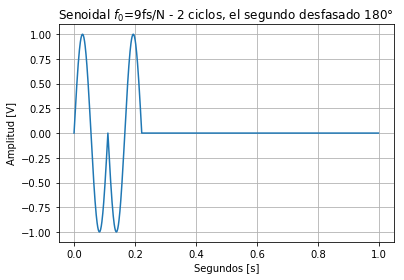

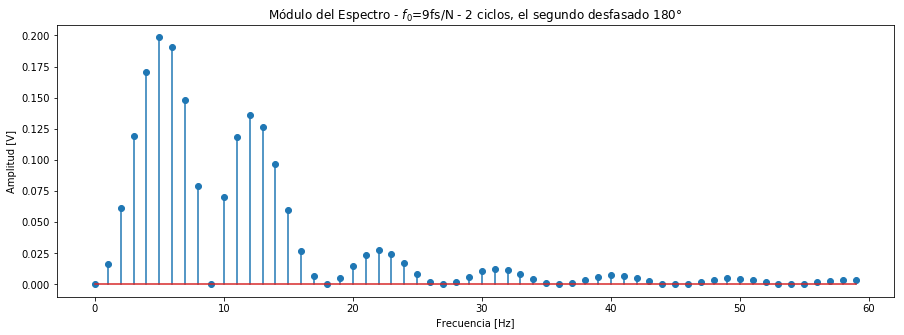

In [68]:
fs=1017
Ts=1/fs
N=1017
f0=(9*fs)/N
Deltaf = fs/N
f0_i = int(np.around(f0/Deltaf))
X = np.zeros(3)

NV = int( 1/(f0*Ts) )
Z = np.zeros([(N-2*NV),1]) 

time,s1 = Senoidal_Generator(fs,f0,NV)
time,s2 = Senoidal_Generator(fs,f0,NV,-1)
time = np.linspace(0,(N-1)*Ts,N).flatten() #linspace(start,stop,total)
time = time.reshape(N,1)
s = np.vstack((s1,s2))
s = np.vstack((s,Z))
PrintArb(time,s,'Segundos [s]','Amplitud [V]','Senoidal $f_0$=9fs/N - 2 ciclos, el segundo desfasado 180°')

espectro,freq = Analizador_de_Espectro(s,N,Ts)
espectro = cleanS(espectro,N)
PrintModule(freq,espectro,0,60,15,5,'$f_0$=9fs/N - 2 ciclos, el segundo desfasado 180°') #f,H(f),start,stop,Xsize,Ysize,label,Type
#PrintPhase(freq,espectro,0,60,15,5,'$f_0$=9fs/N')
X[0] = Energiaf(espectro,N)
X[1] = ( (np.abs((espectro.reshape(N,1))[f0_i]))*(2/N) )**2
X[2] = ArgMax(freq,espectro,N)
print( EnergiaN(s2,N) )

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['2/9 = '+str(round_sig(2/9,4)), 'E = 0', '$f_0$/2='+str(f0/2)], # <-- completar acá
                  ['', '', ''], 
                  [str(round_sig(X[0],4)), str(X[1]), str(round_sig(X[2],4))]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso yo esperaba que hubiera energía en el bin de la mitad de frecuencia que la original, $f_0$. Al invertir un ciclo de la señal, la señal resultante es una del doble de período o la mitad de la frecuencia ya que ahora la secuencia se repite cada 2 ciclos de 9$f_s$/N. Por lo tanto se espera un máximo en 4,5 y considerando que el ancho de la ventana cuadrada es 2/9 del total de las muestras entonces sus ceros también se dan cada 4,5. Esto anularía la energía en el bin de $f_0$.<br/>Además de esto, parece haber una componente al rededor de 13Hz, que también tiene sus lóbulos.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Con las simulaciones realizadas debo concluir que para la medición de cualquiera de estos parámetros es muy probable cometer errores si no se tiene una idea de la forma de la señal temporal. Además la elección de los parámetros de muestreo como el número total de muestras y los efectos que puede causar la ventana rectangular, que siempre está de forma implícita, impactan en gran medida en el espectro obtenido por medio de la fft. Pueden ocurrir efectos como el desparramo de energía en componentes espectrales que no están presentes en la señal o no lograr identificar la frecuencia de la misma. Con respecto a la ventana rectangular, se debe tratar de "llenar" la mayor cantidad de muestras con información posible ya que el ancho de la ventana incrementa y causa que en el espectro se compriman sus lóbulos. De esta forma se logra un menor desparramo y picos mas claros. Algo que cabe mencionar es que se puede hacer uso de otras ventanas temporales con formas distintas, que a diferencia de la rectangular que siempre está implícilta, debe multiplicarse por la señal original. La forma elegida de la ventana impacta en gran medida en el espectro resultante. Con el uso de alguna ventana en particular se podría lograr una mejora en la medición de algún parámetro de la señal. Con respecto a la parte temporal, si la señal tiene una sola frecuencia, al desplazarla en el tiempo genera un cambio lineal en la fase que puede reconocerse. Pero si hay varios componentes desplazados esto puede no ser tan claro en el espectro ya que de por si puede ser dificil reconocer las componenetes si estas se solapan.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,0.8178,0.8238,6.846e-05
8 bits,0.8178,0.8175,6.396e-10
16 bits,0.8178,0.8178,1.421e-19


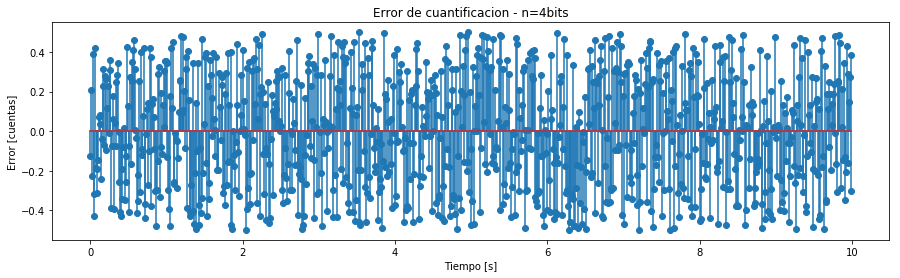

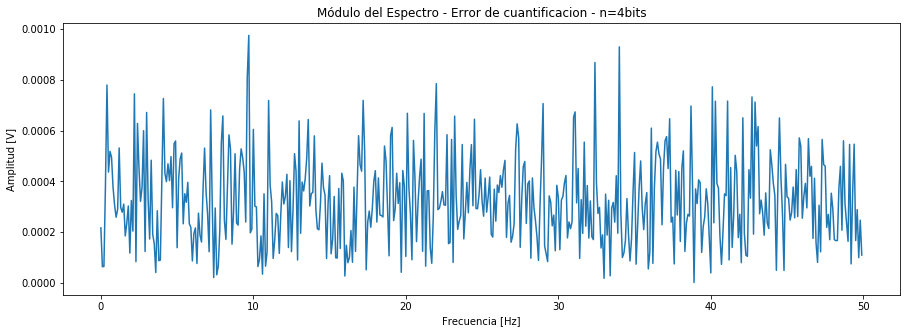

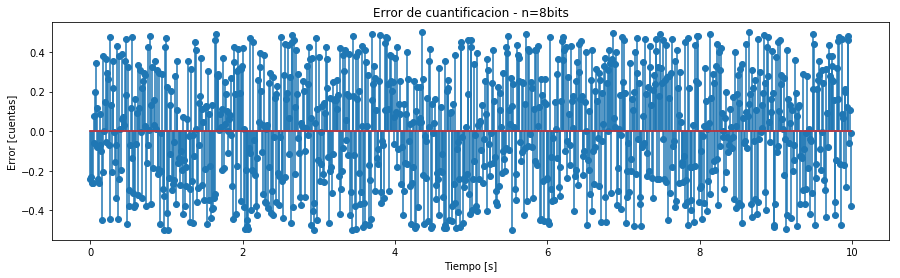

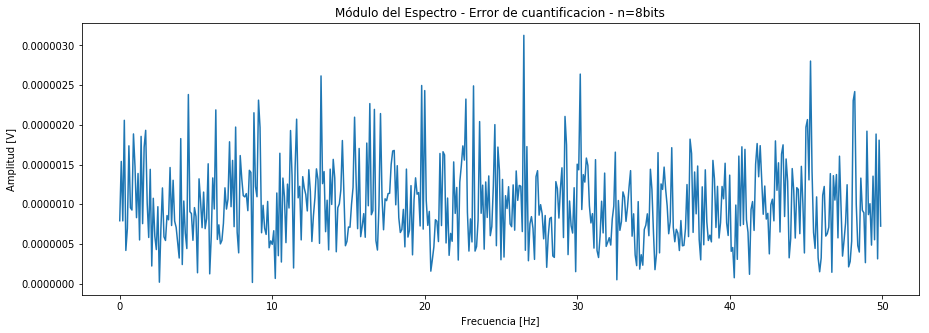

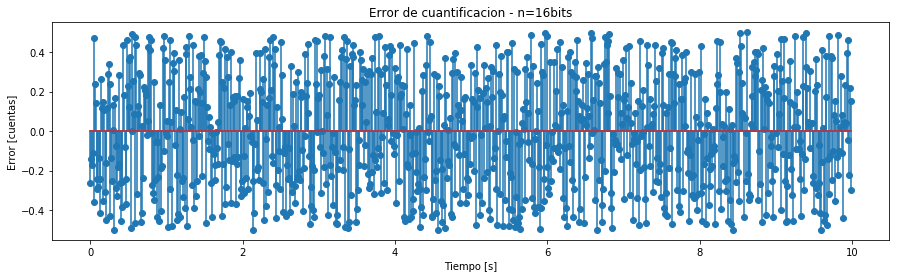

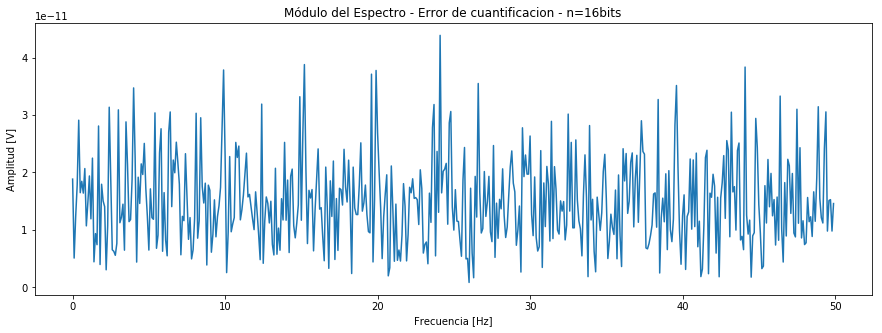

In [70]:
def quant(señal,n):
    #señal *= 0.9
    dq = (2**(n-1))-1
    Q = señal * dq
    Q = np.around(Q)
    return Q
#######################################
# Tu simulación que genere resultados #
#######################################
fs=100
Ts=1/fs
N=1000
##f0=10
f0=fs/100
a0=1
p0=0
X = np.zeros([3,3])

time,s = Senoidal_Generator(fs,f0,N,a0,p0) #s = señal
r = np.random.uniform(-0.1,0.1,(N,1)) #r = ruido
SR = s + r #SR = señal + ruido
SR *= 0.9
espec,freq = Analizador_de_Espectro(SR,N,Ts)
X[0,0] = Energiaf(espec,N)
X[1,0] = X[0,0]
X[2,0] = X[0,0]
#SR *= (2**(n-1))-1

n=4 #numero de bits
SQ = quant(SR,n) #Cuantifico. SQ = señal cuantificada
espec,freq = Analizador_de_Espectro(SQ,N,Ts)
X[0,1] = (Energiaf(espec,N)) / ((2**(n-1))-1)**2 #Divido por el factor de escalado para evaluar la señal en [V]
e1 = SQ - SR*((2**(n-1))-1) #Error en cuentas
e1v = e1 / ((2**(n-1))-1)**2
plt.figure(figsize=(15,4))
plt.stem(time, e1)#, 'b-.')#,'r') scatter
plt.title('Error de cuantificacion - n=4bits')
plt.xlabel('Tiempo [s]')
plt.ylabel('Error [cuentas]')
E1,freq = Analizador_de_Espectro((e1/ ((2**(n-1))-1)**2),N,Ts)
X[0,2] = (Energiaf(E1,N)) #/ ((2**(n-1))-1)**2 #Divido por el factor de escalado para evaluar la señal en [V]
#plt.figure(3)
PrintModule(freq,E1,0,N/2,15,5,'Error de cuantificacion - n=4bits',"plot")

n=8 #numero de bits
SQ = quant(SR,n) #Cuantifico. SQ = señal cuantificada
espec,freq = Analizador_de_Espectro(SQ,N,Ts)
X[1,1] = (Energiaf(espec,N)) / ((2**(n-1))-1)**2 #Divido por el factor de escalado para evaluar la señal en [V]
e2 = SQ - SR*((2**(n-1))-1) #Error en cuentas
e2v = e2 / ((2**(n-1))-1)**2
plt.figure(figsize=(15,4))
plt.stem(time, e2)#,'r')
plt.title('Error de cuantificacion - n=8bits')
plt.xlabel('Tiempo [s]')
plt.ylabel('Error [cuentas]')
E2,freq = Analizador_de_Espectro((e2/ ((2**(n-1))-1)**2),N,Ts)
X[1,2] = (Energiaf(E2,N)) #/ ((2**(n-1))-1)**2 #Divido por el factor de escalado para evaluar la señal en [V]
#plt.figure(5)
PrintModule(freq,E2,0,N/2,15,5,'Error de cuantificacion - n=8bits',"plot")

n=16 #numero de bits
SQ = quant(SR,n) #Cuantifico. SQ = señal cuantificada
espec,freq = Analizador_de_Espectro(SQ,N,Ts)
X[2,1] = (Energiaf(espec,N)) / ((2**(n-1))-1)**2 #Divido por el factor de escalado para evaluar la señal en [V]
e3 = SQ - SR*((2**(n-1))-1) #Error en cuentas
e3v = e3 / ((2**(n-1))-1)**2
plt.figure(figsize=(15,4))
plt.stem(time, e3)#,'r')
plt.title('Error de cuantificacion - n=16bits')
plt.xlabel('Tiempo [s]')
plt.ylabel('Error [cuentas]')
E3,freq = Analizador_de_Espectro((e3/ ((2**(n-1))-1)**2),N,Ts)
X[2,2] = (Energiaf(E3,N)) #/ ((2**(n-1))-1)**2 #Divido por el factor de escalado para evaluar la señal en [V]
#plt.figure(5)
PrintModule(freq,E3,0,N/2,15,5,'Error de cuantificacion - n=16bits',"plot")

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   [str(round_sig(X[0,0],4)), str(round_sig(X[0,1],4)), str(round_sig(X[0,2],4))], # <-- completar acá
                   [str(round_sig(X[1,0],4)), str(round_sig(X[1,1],4)), str(round_sig(X[1,2],4))], # <-- completar acá
                   [str(round_sig(X[2,0],4)), str(round_sig(X[2,1],4)), str(round_sig(X[2,2],4))], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

Text(0,0.5,'Repeticiones [N°]')

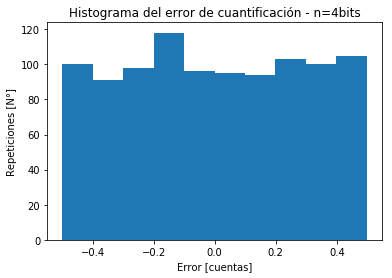

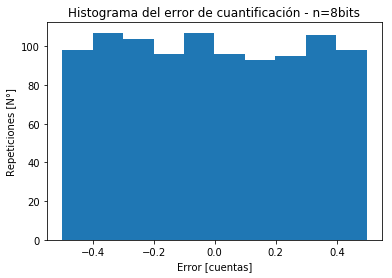

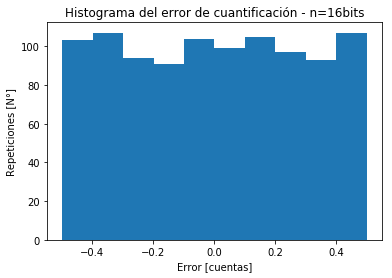

In [21]:
#####################################
# Tu simulación que genere gráficas #
#####################################
plt.figure()
plt.hist(e1,10)
plt.title('Histograma del error de cuantificación - n=4bits')
plt.xlabel('Error [cuentas]')
plt.ylabel('Repeticiones [N°]')

plt.figure()
plt.hist(e2,10)
plt.title('Histograma del error de cuantificación - n=8bits')
plt.xlabel('Error [cuentas]')
plt.ylabel('Repeticiones [N°]')

plt.figure()
plt.hist(e3,10)
plt.title('Histograma del error de cuantificación - n=16bits')
plt.xlabel('Error [cuentas]')
plt.ylabel('Repeticiones [N°]')

¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Mediante un histograma podemos verificar como es la probabilidad de distribución de la señal de error. Se espera que este acotada entre +/-q/2 que en este caso como se grafica el error en cuentas deberia ser +/-0.5, y de hecho esto se cumple. También se espera que de uniforme ya que la señal de error de cuantificación es de naturaleza estocástica por lo que debería haber igual probabilidad de ocurrencia para cada valor entre +/-q/2. Esto se cumple en buena medida. No es perfectamente uniforme por que la señal cuantificada proviene de una señal determinsitica (senoidal) con un ruido agregado, por lo cual dependiendo del nivel de ruido va a ser mas o menos deterministica la señal.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [73]:
def Mean(data,N):
    avg=0
    for i in range(N):
        avg += data[i]
    avg /= N
    return avg

def RMS(data,N):
    rms=0
    for i in range(N):
        rms += ((data[i])**2)
    rms = ((rms/N)**(0.5))
    return rms

def Energia(E,N):
    #R = int(N/2)
    E = E.reshape(N,1)
    A = 0
    for i in range(N):
        A += (np.abs(E[i]))**2
    return A
#######################################
# Tu simulación que genere resultados #
#######################################
AVG = np.zeros(3)
rms = np.zeros(3)
ENE = np.zeros(3)

#e1 /= ((2**(4-1))-1)**2
#e2 /= ((2**(8-1))-1)**2
#e3 /= ((2**(16-1))-1)**2
AVG[0] = Mean(e1v,N)
AVG[1] = Mean(e2v,N)
AVG[2] = Mean(e3v,N)

rms[0] = RMS(e1v,N)
rms[1] = RMS(e2v,N)
rms[2] = RMS(e3v,N)

ENE[0] = EnergiaN(e1v,N)
ENE[1] = EnergiaN(e2v,N)
ENE[2] = EnergiaN(e3v,N)

#print(X[0,2]/ENE[0])
#print(X[1,2]/ENE[1])
#print(X[2,2]/ENE[2])

tus_resultados = [ 
                   [str(round_sig(AVG[0],4)), str(round_sig(rms[0],4)), str(round_sig(ENE[0],4))], # <-- completar acá
                   [str(round_sig(AVG[1],4)), str(round_sig(rms[1],4)), str(round_sig(ENE[1],4))], # <-- completar acá
                   [str(round_sig(AVG[2],4)), str(round_sig(rms[2],4)), str(round_sig(ENE[2],4))], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,-0.0001082,0.005852,6.85e-05
8 bits,3.963e-07,1.789e-05,6.403e-10
16 bits,-9.421e-12,2.667e-10,1.423e-19


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [74]:
def Varianza(data,Mean,N):
    V=0
    for i in range(N):
        V += ((data[i]-Mean)**2)
    V = V/(N-1)
    return V
#######################################
# Tu simulación que genere resultados #
#######################################
VAR = np.zeros(3)

VAR[0] = Varianza(e1v,AVG[0],N)
VAR[1] = Varianza(e2v,AVG[1],N)
VAR[2] = Varianza(e3v,AVG[2],N)

tus_resultados = [ 
                   [str(round_sig(AVG[0],4)), str(round_sig(VAR[0]**(0.5),4)), str(round_sig(VAR[0],4))], # <-- completar acá
                   [str(round_sig(AVG[1],4)), str(round_sig(VAR[1]**(0.5),4)), str(round_sig(VAR[1],4))], # <-- completar acá
                   [str(round_sig(AVG[2],4)), str(round_sig(VAR[2]**(0.5),4)), str(round_sig(VAR[2],4))], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,-0.0001082,0.005854,3.427e-05
8 bits,3.963e-07,1.79e-05,3.203e-10
16 bits,-9.421e-12,2.667e-10,7.112000000000001e-20


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Primero que nada el valor medio y la media corresponden al mismo valor ya que si bien uno es una característica de un señal y el otro valor estadístico, la ecuación es la misma. Estos valores son muy pequeños y en realidad se espera que el valor medio de una señal aleatoria como el ruido de cuantificación sea cero.<br/>Despues otra cosa esperada es que el valor RMS sea igual a la raiz cuadrada de la suma de los cuadrados de la media y el desvio estándar y si se observan los valores esto se cumple ya que al ser la media muy pequeña comparada con el desvio entonces el valor RMS es prácticamente igual al desvio estándar. La explicación de esto es que el valor RMS de una señal tiene en cuenta la componente de continua y la de alterna de una señal donde la continua esta representada por la media y la alterna, que se relaciona con la variación de la señal, por el desvio estándar.<br/>Otra cosa que cabe mencionar es el cumplimiento del teorema de parseval con respecto a la energía. Si se comparan los valores de energía obtenidos para E(f), espectro de la señal de error, en el punto 5.a) y lo obtenido para e(n), señal de error "temporal", en este punto 5.d) se ve que son iguales para cada numero de bits. En realidad la igualdad o no de estos valores va a depender de como se calcule la energía y es común que los mismos difieran en un factor proporcional a N (número de muestras). En este caso yo ajuste mis funciones de cálculo de energía para que esto se cumpla y asi poder comparar y verificar las distintas simulaciones y predicciones realizadas. 
</div>